In [ ]:
'''
Boxplots for all Ventilated Patients. SBS Score data points were normalized via SBS 0 score waveform data.
'''

# Import Modules
import sys
sys.path.append("..")
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.lines as mlines
from scipy.io import loadmat
import scipy
from scipy.stats import ttest_ind, skew, ttest_rel
import Actigraph_Metrics

**Plotting Functions**

In [3]:
def MAD_boxplot(sbs, x_mag, window_size=100, show_outlier=True):
    # Accelerometry is at 100 Hz, so window_size = 100 means 1 second
    
    # Output Boxplot for each SBS Score
    sbs_mad_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_skew_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_stdev_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_mean_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}


    # Populate the dictionary with MAD values
    for i, sbs_value in enumerate(sbs):    
        signal = Actigraph_Metrics.VecMag_MAD(x_mag[i,:], window_size)
        sbs_mad_dict[sbs_value].extend(signal)
        sbs_skew_dict[sbs_value].append(skew(signal, axis = 0, bias = True))
        sbs_stdev_dict[sbs_value].append(np.std(signal))
        sbs_mean_dict[sbs_value].append(np.mean(signal))
        
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))

    # Box plot: this version will show the outliers too
    ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[1,0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[1,1].boxplot([sbs_mean_dict[-3], sbs_mean_dict[-2], sbs_mean_dict[-1], sbs_mean_dict[0], sbs_mean_dict[1], sbs_mean_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    #label axes
    ax[0,0].set_xlabel('SBS Score', fontsize = 8)
    ax[0,0].set_ylabel('MAD', fontsize = 8)
    ax[0,1].set_xlabel('SBS Score', fontsize = 8)
    ax[0,1].set_ylabel('Skew', fontsize = 8)
    ax[1,0].set_xlabel('SBS Score', fontsize = 8)
    ax[1,0].set_ylabel('Mean', fontsize = 8)
    ax[1,1].set_xlabel('SBS Score', fontsize = 8)
    ax[1,1].set_ylabel('Standard Deviation', fontsize = 8)
    
    # T-test Comparisons
    # -2 and 2
    # t_stat_mad, p_value_mad = ttest_ind(sbs_mad_dict[2], sbs_mad_dict[-2], equal_var=False)

    # print("T-test for MAD values:")
    # print("T-statistic:", t_stat_mad)
    # print("P-value:", p_value_mad)

        # T-test Comparisons
    sbs_values = [-2, -1, 0, 1, 2]
    for i in range(len(sbs_values)):
        for j in range(i + 1, len(sbs_values)):
            sbs_i = sbs_values[i]
            sbs_j = sbs_values[j]
            if sbs_mad_dict[sbs_i] and sbs_mad_dict[sbs_j]:
                t_stat_mad, p_value_mad = ttest_ind(sbs_mad_dict[sbs_i], sbs_mad_dict[sbs_j], equal_var=False)
                print(f"T-test for MAD values between SBS Score {sbs_i} and {sbs_j}:")
                print(f"T-statistic: {t_stat_mad}")
                print(f"P-value: {p_value_mad}")
                print()

    return ax, sbs_mad_dict, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict

def vitals_boxplot(sbs, vitals_signal, window_size=100, show_outlier=True):
    # Output Boxplot for each SBS Score
    sbs_skew_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_stdev_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}
    sbs_mean_dict = {-3: [], -2: [], -1: [], 0: [], 1: [], 2: []}


    # Populate the dictionary with MAD values
    for i, sbs_value in enumerate(sbs):    
        signal = vitals_signal[i]
        if np.mean(signal) !=0:
            sbs_skew_dict[sbs_value].append(skew(signal))
            sbs_stdev_dict[sbs_value].append(np.std(signal))
            sbs_mean_dict[sbs_value].append(np.mean(signal))
        else:
            print(f'not enough data at sbs index {i}, flag_list detected') #flag list was detected here. Note: If you go into matlab to cross-check, be aware matlab indices start at 1
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,6))
    
    #Drop NaN Values
    sbs_skew_dict = {key: [x for x in value if not np.isnan(x)] for key, value in sbs_skew_dict.items()}
    sbs_stdev_dict = {key: [x for x in value if not np.isnan(x)] for key, value in sbs_stdev_dict.items()}
    sbs_mean_dict = {key: [x for x in value if not np.isnan(x)] for key, value in sbs_mean_dict.items()}
    
    # Box plot: this version will show the outliers too
    ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)
    ax[2].boxplot([sbs_mean_dict[-3], sbs_mean_dict[-2], sbs_mean_dict[-1], sbs_mean_dict[0], sbs_mean_dict[1], sbs_mean_dict[2]], 
                    labels=['-3','-2', '-1', '0', '1', '2'], showfliers=show_outlier)

    #label axes
    ax[0].set_xlabel('SBS Score', fontsize = 10)
    ax[0].set_ylabel('Stdev', fontsize = 10)
    ax[2].set_xlabel('SBS Score', fontsize = 10)
    ax[2].set_ylabel('Mean', fontsize = 10)
    ax[1].set_xlabel('SBS Score', fontsize = 10)
    ax[1].set_ylabel('Skew', fontsize = 10)

    # T-test
    sbs_values = [-3, -2, -1, 0, 1, 2]
    for i in range(len(sbs_values)):
        for j in range(i + 1, len(sbs_values)):
            sbs_i = sbs_values[i]
            sbs_j = sbs_values[j]
            if sbs_mean_dict[sbs_i] and sbs_mean_dict[sbs_j]:
                t_stat_mean, p_value_mean = ttest_ind(sbs_mean_dict[sbs_i], sbs_mean_dict[sbs_j], equal_var=False)
                t_stat_stdev, p_value_stdev = ttest_ind(sbs_stdev_dict[sbs_i], sbs_stdev_dict[sbs_j], equal_var=False)
                print(f"T-test for mean values between SBS Score {sbs_i} and {sbs_j}:")
                print(f"T-statistic: {t_stat_mean}")
                print(f"P-value: {p_value_mean}")
                print(f"T-test for standard deviation values between SBS Score {sbs_i} and {sbs_j}:")
                print(f"T-statistic: {t_stat_stdev}")
                print(f"P-value: {p_value_stdev}")
                print()
    return ax, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict

def report_quartiles(sbs_mad_dict):
    # print quartiles and 90th percentile
    quartiles = {}
    for sbs_value, mad_list in sbs_mad_dict.items():
        quartiles[sbs_value] = {
            'Q1': np.percentile(mad_list, 25),
            'Q2': np.percentile(mad_list, 50),
            'Q3': np.percentile(mad_list, 75),
            '90th Percentile': np.percentile(mad_list, 90)
        }

    # Print quartiles and 90th percentile
    for sbs_value, values in quartiles.items():
        print(f"SBS Score: {sbs_value}")
        print(f"Q1: {values['Q1']}")
        print(f"Q2 (Median): {values['Q2']}")
        print(f"Q3: {values['Q3']}")
        print(f"90th Percentile: {values['90th Percentile']}")
        print()

**Load All Patient Data**

In [ ]:
data_dir = 'C:/Users/sidha/OneDrive/Sid_stuff/PROJECTS/PedAccel/data_analysis/Vitals_accel_analysis/PatientData'
# data_dir = r'C:\Users\jakes\Documents\DT 6 Analysis\PythonCode\PedAccel\data_analysis\PythonPipeline\PatientData'
window_size = 100 #100 is 1 second worth of time
lead_time = 15
slice_size_min = 16
sr = .5

C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1,0].boxplot([sbs_stdev_dict

T-test for MAD values between SBS Score -2 and -1:
T-statistic: -2.4479027544230343
P-value: 0.014542087649542913

T-test for MAD values between SBS Score -2 and 0:
T-statistic: -9.413316314577783
P-value: 5.677812215323143e-21

T-test for MAD values between SBS Score -2 and 1:
T-statistic: -9.918094200407044
P-value: 1.1953339907194673e-22

T-test for MAD values between SBS Score -1 and 0:
T-statistic: -1.9586404665282846
P-value: 0.05034794576640281

T-test for MAD values between SBS Score -1 and 1:
T-statistic: -7.934397617194859
P-value: 3.110423090828651e-15

T-test for MAD values between SBS Score 0 and 1:
T-statistic: -7.560200207946563
P-value: 5.95726644979335e-14



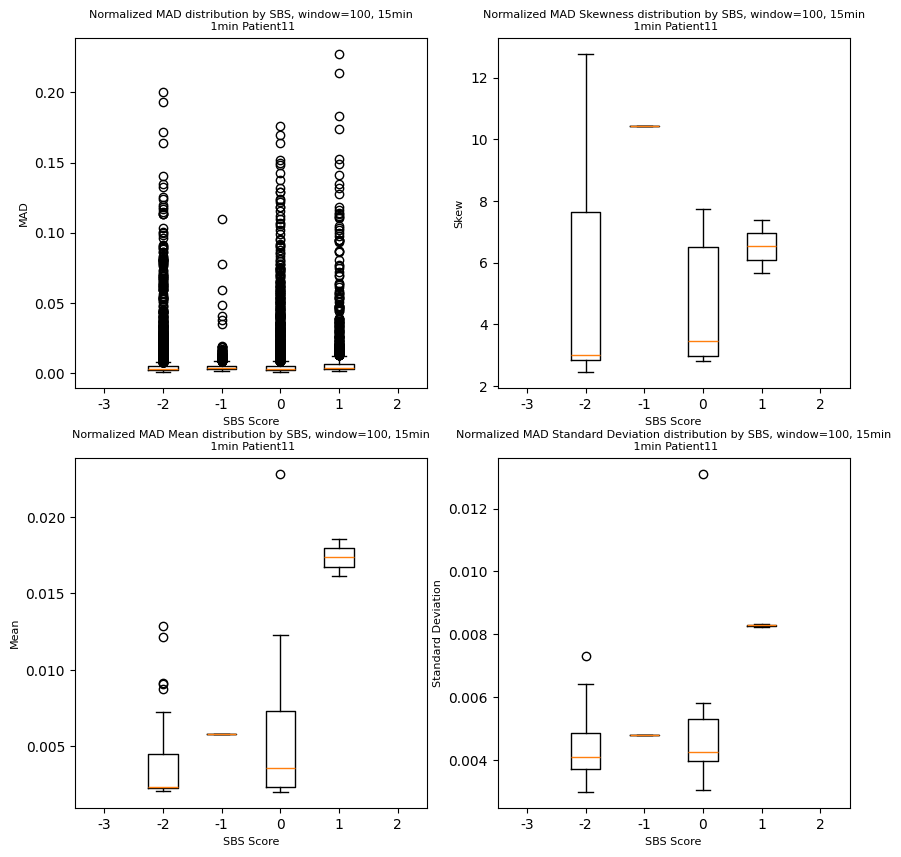

Shape of normalized hr signal for BoxPlot function: (59, 480)
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 16, flag_list detected
not enough data at sbs index 22, flag_list detected
not enough data at sbs index 39, flag_list detected
not enough data at sbs index 42, flag_list detected
not enough data at sbs index 49, flag_list detected
not enough data at sbs index 57, flag_list detected
T-test for mean values between SBS Score -2 and -1:
T-statistic: nan
P-value: nan
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: nan
P-value: nan

T-test for mean values between SBS Score -2 and 0:
T-statistic: 1.208485662275242
P-value: 0.2362868346762555
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: -1.449378632707884
P-value: 0.17513649746506016

T-test for mean values between SBS Score -2 and 1:
T-statistic: -1.204553606879534
P-value: 0.24172778501093883
T-test for standard deviation values between SB

C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sbs_mean

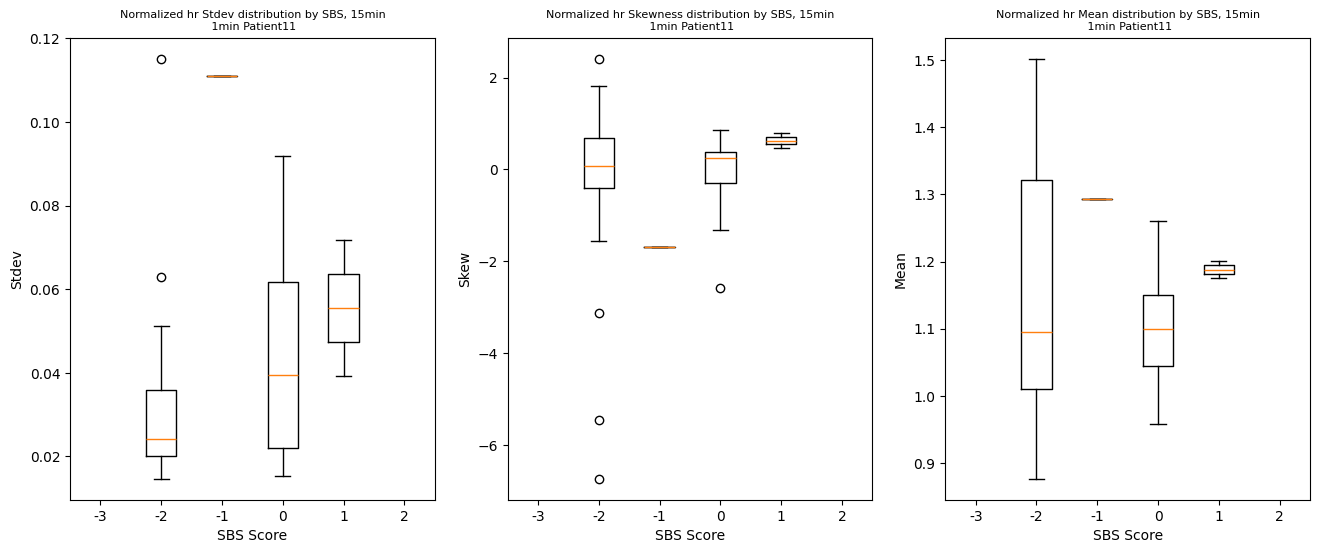

Shape of normalized rr signal for BoxPlot function: (59, 480)
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 2, flag_list detected
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 18, flag_list detected
not enough data at sbs index 20, flag_list detected
not enough data at sbs index 21, flag_list detected
not enough data at sbs index 22, flag_list detected
not enough data at sbs index 43, flag_list detected
not enough data at sbs index 46, flag_list detected
not enough data at sbs index 47, flag_list detected
T-test for mean values between SBS Score -2 and 0:
T-statistic: -2.899518605775326
P-value: 0.006244661573301711
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: -0.6204256893504109
P-value: 0.5492477951281354

T-test for mean values between SBS Score -2 and 1:
T-statistic: 1.1946597611210141
P-value: 0.35461294189307774
T-test for standard deviation values between SBS Score -2 and 1:
T-st

C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sbs_mean

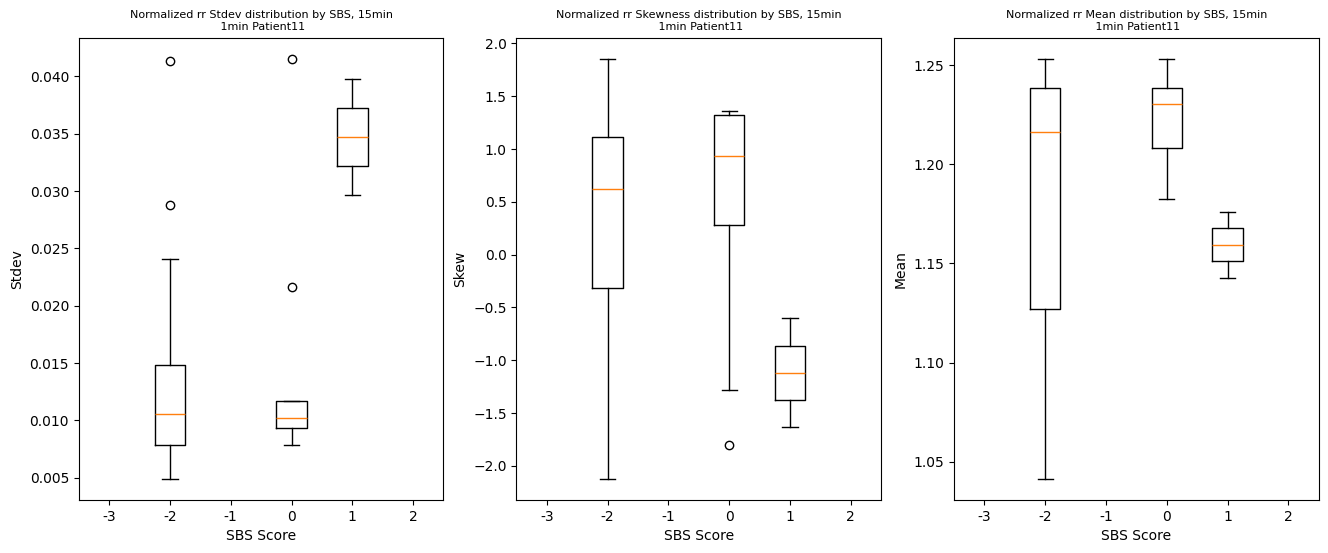

Shape of normalized spo2 signal for BoxPlot function: (59, 480)
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 1, flag_list detected
not enough data at sbs index 2, flag_list detected
not enough data at sbs index 3, flag_list detected
not enough data at sbs index 18, flag_list detected
not enough data at sbs index 20, flag_list detected
not enough data at sbs index 22, flag_list detected
not enough data at sbs index 39, flag_list detected
not enough data at sbs index 42, flag_list detected
not enough data at sbs index 43, flag_list detected
not enough data at sbs index 44, flag_list detected
not enough data at sbs index 45, flag_list detected
not enough data at sbs index 46, flag_list detected
not enough data at sbs index 47, flag_list detected
not enough data at sbs index 48, flag_list detected
not enough data at sbs index 49, flag_list detected
not enough data at sbs index 50, flag_list detected
not enough data at sbs index 51, flag_list detected
not 

C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sbs_mean

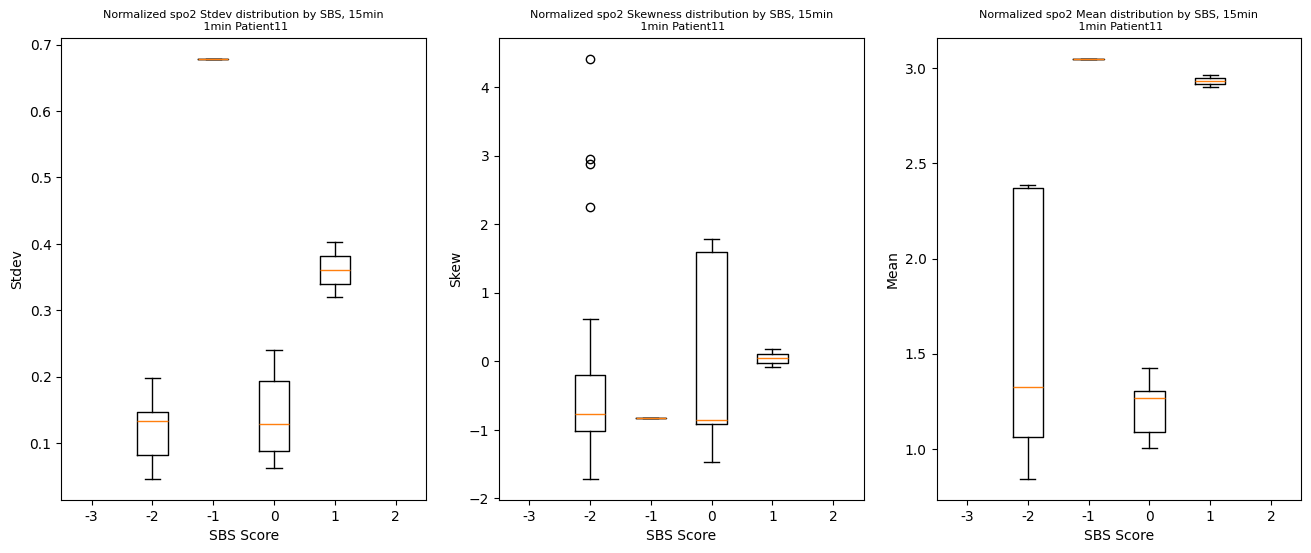

C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1,0].boxplot([sbs_stdev_dict

T-test for MAD values between SBS Score -2 and -1:
T-statistic: -2.81683685666526
P-value: 0.0048568439427892195

T-test for MAD values between SBS Score -2 and 0:
T-statistic: 0.01672630509458032
P-value: 0.9866550467403384

T-test for MAD values between SBS Score -2 and 1:
T-statistic: -2.0799591668256365
P-value: 0.03757137715116627

T-test for MAD values between SBS Score -1 and 0:
T-statistic: 3.3060826148739553
P-value: 0.0009504397925875849

T-test for MAD values between SBS Score -1 and 1:
T-statistic: -0.3993919819426853
P-value: 0.6896160609968157

T-test for MAD values between SBS Score 0 and 1:
T-statistic: -2.190126795922103
P-value: 0.028561279403319262



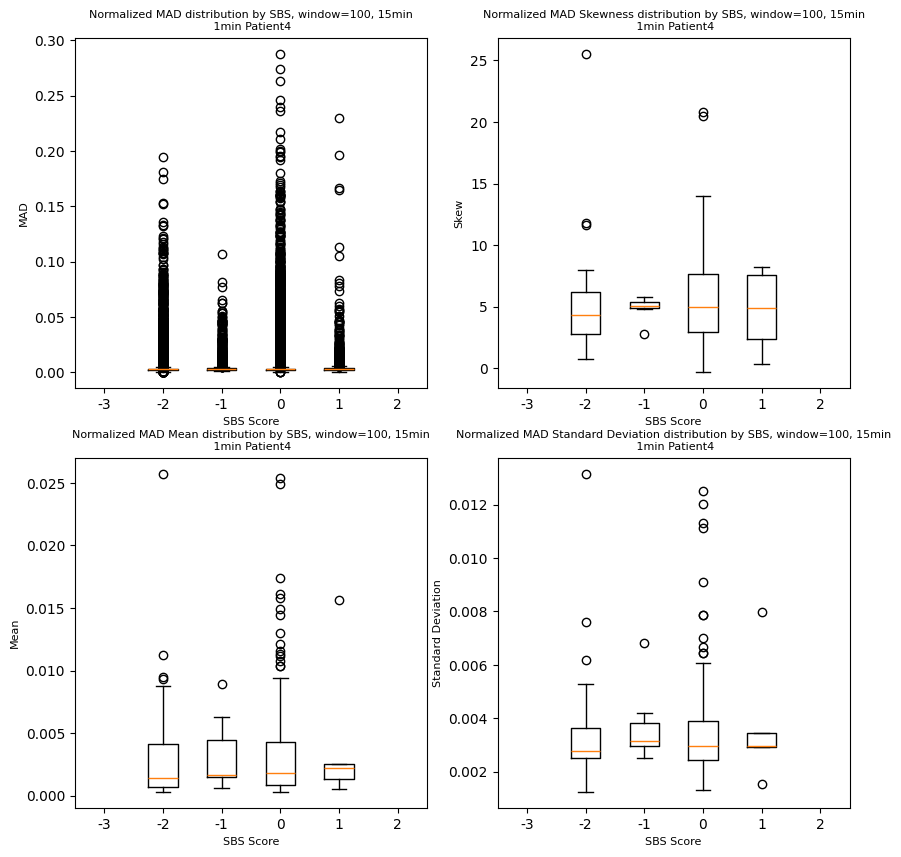

Shape of normalized hr signal for BoxPlot function: (211, 480)
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 16, flag_list detected
not enough data at sbs index 19, flag_list detected
not enough data at sbs index 45, flag_list detected
not enough data at sbs index 88, flag_list detected
not enough data at sbs index 95, flag_list detected
not enough data at sbs index 96, flag_list detected
not enough data at sbs index 105, flag_list detected
not enough data at sbs index 106, flag_list detected
not enough data at sbs index 107, flag_list detected
not enough data at sbs index 135, flag_list detected
not enough data at sbs index 170, flag_list detected
not enough data at sbs index 178, flag_list detected
not enough data at sbs index 179, flag_list detected
not enough data at sbs index 203, flag_list detected
T-test for mean values between SBS Score -2 and -1:
T-statistic: -1.3289948967877672
P-value: 0.2145506272937784
T-test for standard deviation values 

C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sbs_mean

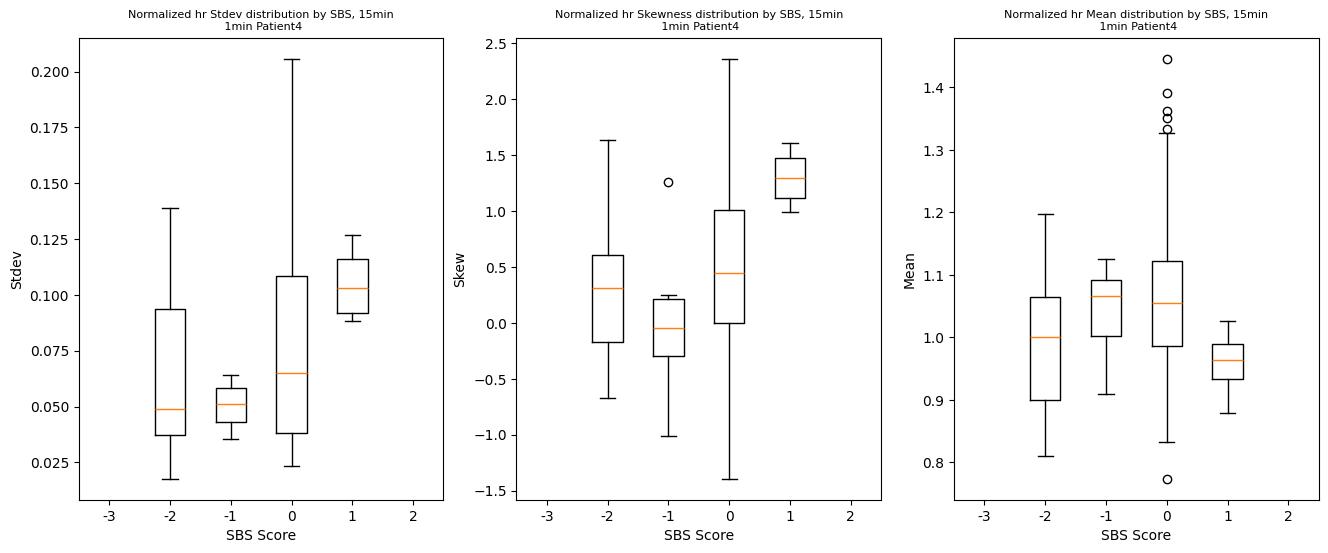

Shape of normalized rr signal for BoxPlot function: (211, 480)
not enough data at sbs index 0, flag_list detected
not enough data at sbs index 2, flag_list detected
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 14, flag_list detected
not enough data at sbs index 18, flag_list detected
not enough data at sbs index 19, flag_list detected
not enough data at sbs index 36, flag_list detected
not enough data at sbs index 45, flag_list detected
not enough data at sbs index 64, flag_list detected
not enough data at sbs index 65, flag_list detected
not enough data at sbs index 95, flag_list detected
not enough data at sbs index 96, flag_list detected
not enough data at sbs index 106, flag_list detected
not enough data at sbs index 135, flag_list detected
not enough data at sbs index 170, flag_list detected
not enough data at sbs index 179, flag_list detected
not enough data at sbs index 181, flag_list detected
not enough data at sbs index 191, flag_list detecte

C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sbs_mean

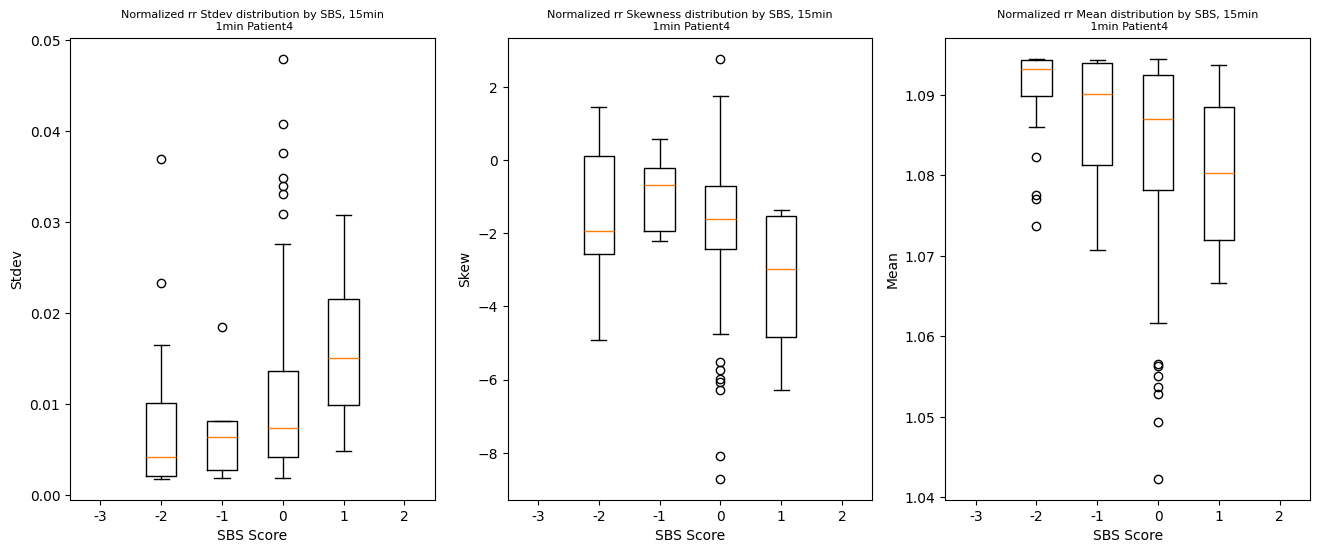

Shape of normalized spo2 signal for BoxPlot function: (211, 480)
not enough data at sbs index 7, flag_list detected
not enough data at sbs index 16, flag_list detected
not enough data at sbs index 19, flag_list detected
not enough data at sbs index 21, flag_list detected
not enough data at sbs index 40, flag_list detected
not enough data at sbs index 47, flag_list detected
not enough data at sbs index 61, flag_list detected
not enough data at sbs index 86, flag_list detected
not enough data at sbs index 88, flag_list detected
not enough data at sbs index 91, flag_list detected
not enough data at sbs index 95, flag_list detected
not enough data at sbs index 96, flag_list detected
not enough data at sbs index 103, flag_list detected
not enough data at sbs index 104, flag_list detected
not enough data at sbs index 105, flag_list detected
not enough data at sbs index 107, flag_list detected
not enough data at sbs index 108, flag_list detected
not enough data at sbs index 116, flag_list det

C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sbs_mean

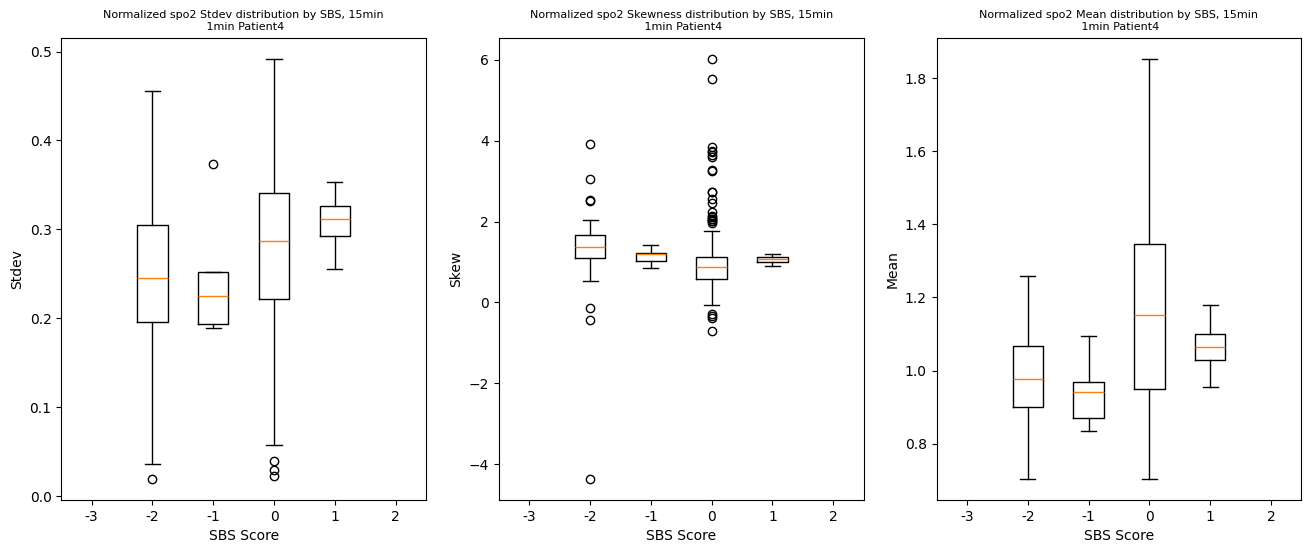

C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,0].boxplot([sbs_mad_dict[-3], sbs_mad_dict[-2], sbs_mad_dict[-1], sbs_mad_dict[0], sbs_mad_dict[1], sbs_mad_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0,1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:26: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1,0].boxplot([sbs_stdev_dict

T-test for MAD values between SBS Score -2 and -1:
T-statistic: 14.779566156821728
P-value: 2.197196454394709e-49

T-test for MAD values between SBS Score -2 and 0:
T-statistic: 14.43038276524202
P-value: 3.6841999353286054e-47

T-test for MAD values between SBS Score -2 and 1:
T-statistic: -0.674630328987995
P-value: 0.49998940501580336

T-test for MAD values between SBS Score -1 and 0:
T-statistic: 2.2446150081518352
P-value: 0.024796017413158167

T-test for MAD values between SBS Score -1 and 1:
T-statistic: -2.807400002625323
P-value: 0.005044306823391899

T-test for MAD values between SBS Score 0 and 1:
T-statistic: -3.0920988537798113
P-value: 0.0020153585213803834



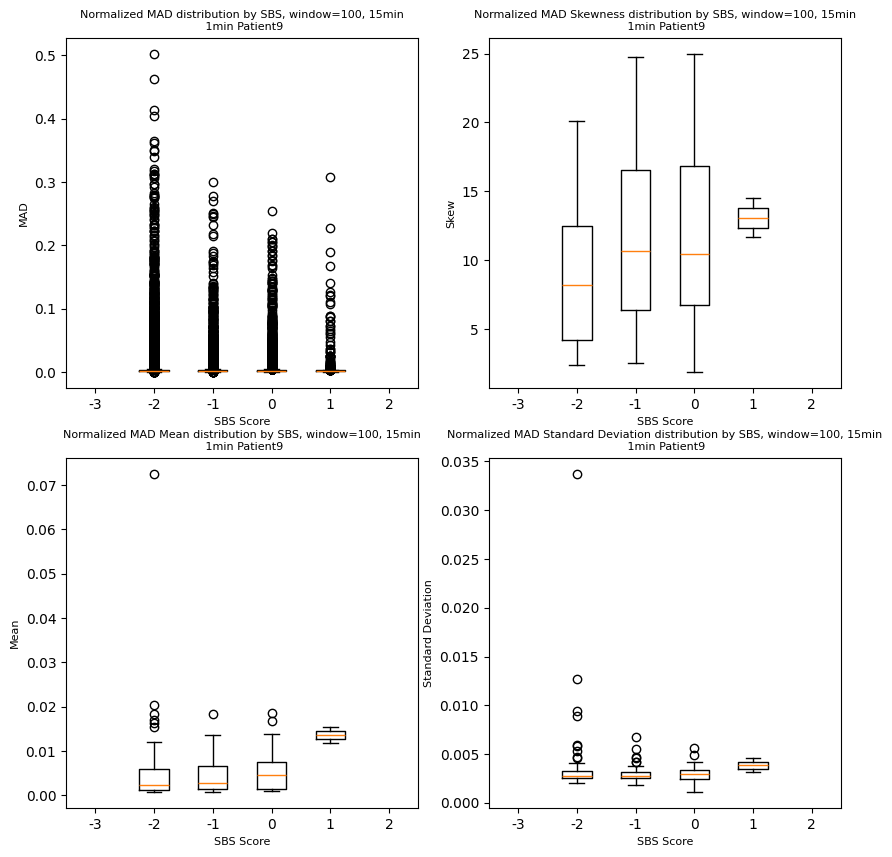

Shape of normalized hr signal for BoxPlot function: (192, 480)
not enough data at sbs index 16, flag_list detected
not enough data at sbs index 60, flag_list detected
not enough data at sbs index 88, flag_list detected
not enough data at sbs index 123, flag_list detected
not enough data at sbs index 124, flag_list detected
not enough data at sbs index 131, flag_list detected
not enough data at sbs index 142, flag_list detected
not enough data at sbs index 149, flag_list detected
not enough data at sbs index 161, flag_list detected
T-test for mean values between SBS Score -2 and -1:
T-statistic: 1.887061282018993
P-value: 0.06120779191591702
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: -0.7117617152007307
P-value: 0.47793570133968866

T-test for mean values between SBS Score -2 and 0:
T-statistic: -0.36313065553481
P-value: 0.717573656336906
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: -2.0341328222228983
P-value: 0.0464

C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sbs_mean

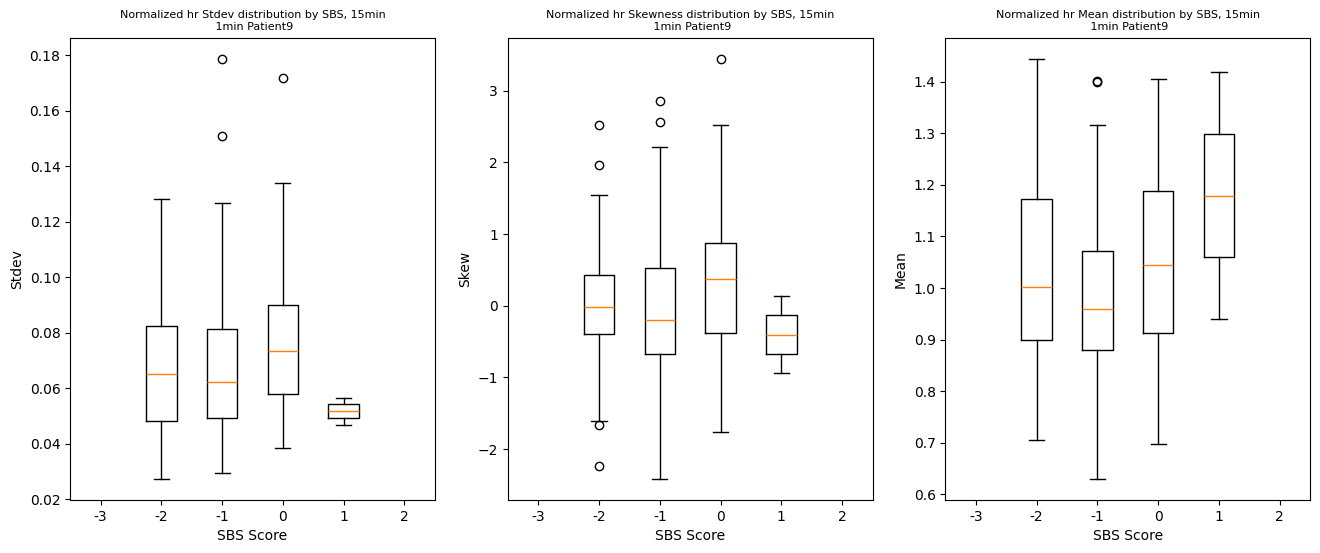

Shape of normalized rr signal for BoxPlot function: (192, 480)
not enough data at sbs index 38, flag_list detected
not enough data at sbs index 54, flag_list detected
not enough data at sbs index 60, flag_list detected
not enough data at sbs index 69, flag_list detected
not enough data at sbs index 97, flag_list detected
not enough data at sbs index 131, flag_list detected
not enough data at sbs index 138, flag_list detected
not enough data at sbs index 155, flag_list detected
T-test for mean values between SBS Score -2 and -1:
T-statistic: -1.526528065139953
P-value: 0.1291175109710488
T-test for standard deviation values between SBS Score -2 and -1:
T-statistic: 1.5115835019462844
P-value: 0.13286253804491166

T-test for mean values between SBS Score -2 and 0:
T-statistic: -0.6588525033341189
P-value: 0.5118966510883093
T-test for standard deviation values between SBS Score -2 and 0:
T-statistic: -0.06629101550677947
P-value: 0.9473561654024121

T-test for mean values between SBS Sco

C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sbs_mean

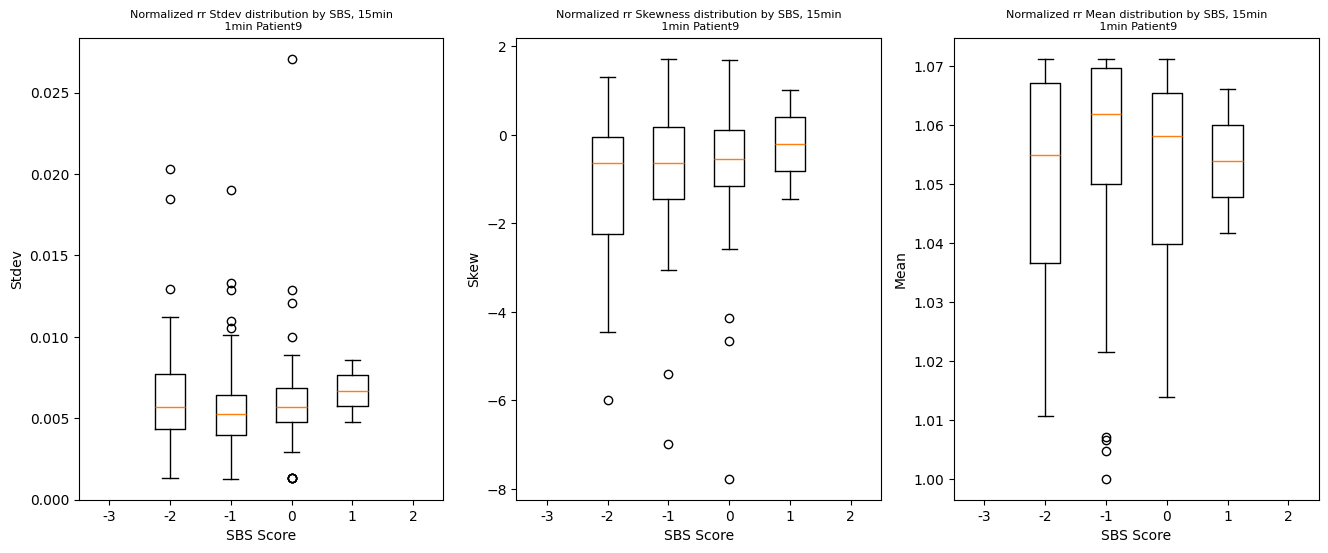

Shape of normalized spo2 signal for BoxPlot function: (192, 480)
not enough data at sbs index 16, flag_list detected
not enough data at sbs index 36, flag_list detected
not enough data at sbs index 37, flag_list detected
not enough data at sbs index 38, flag_list detected
not enough data at sbs index 60, flag_list detected
not enough data at sbs index 69, flag_list detected
not enough data at sbs index 88, flag_list detected
not enough data at sbs index 119, flag_list detected
not enough data at sbs index 123, flag_list detected
not enough data at sbs index 124, flag_list detected
not enough data at sbs index 131, flag_list detected
not enough data at sbs index 142, flag_list detected
not enough data at sbs index 149, flag_list detected
not enough data at sbs index 150, flag_list detected
not enough data at sbs index 161, flag_list detected
not enough data at sbs index 174, flag_list detected
not enough data at sbs index 179, flag_list detected
not enough data at sbs index 180, flag_li

C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:87: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[1].boxplot([sbs_skew_dict[-3], sbs_skew_dict[-2], sbs_skew_dict[-1], sbs_skew_dict[0], sbs_skew_dict[1], sbs_skew_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:89: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[0].boxplot([sbs_stdev_dict[-3], sbs_stdev_dict[-2], sbs_stdev_dict[-1], sbs_stdev_dict[0], sbs_stdev_dict[1], sbs_stdev_dict[2]],
C:\Users\sidha\AppData\Local\Temp\ipykernel_28096\3909337004.py:91: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax[2].boxplot([sbs_mean

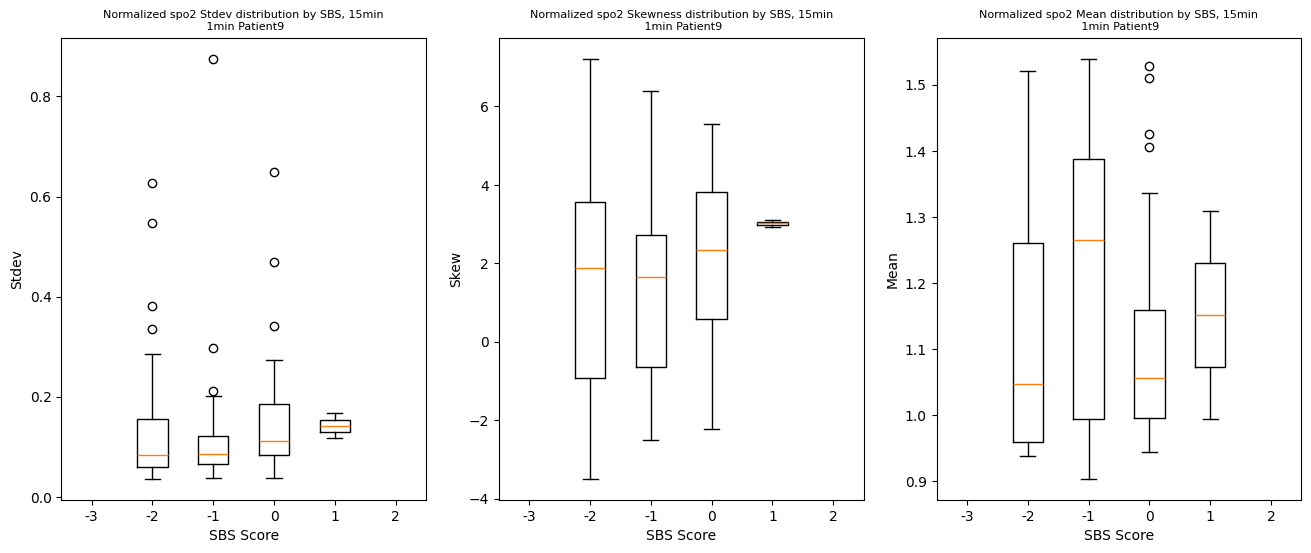

In [12]:
for patient in os.listdir(data_dir):
    patient_dir = os.path.join(data_dir, patient)
    if os.path.isdir(patient_dir):     
        data_filepath = os.path.join(patient_dir, f'{patient}_SICKBAY_{lead_time}MIN_{slice_size_min - lead_time}MIN_Retro.mat')
        
        data = loadmat(data_filepath)
        x_mag = data["x_mag"]
        SBS = data["sbs"].flatten()  # SBS should be 1D
        
        hr = data['heart_rate']
        SpO2 = data['SpO2']
        rr = data['respiratory_rate']
        bps = data['blood_pressure_systolic']
        bpm = data['blood_pressure_mean']
        bpd = data['blood_pressure_diastolic']
        vitals_list = [hr, rr, SpO2, bpm, bps, bpd]
        vitals_names = ['hr', 'rr', 'spo2', 'bpm', 'bps', 'bpd']

        # Create a DataFrame with 1D data
        epic_data = pd.DataFrame({
            'SBS': SBS,
        })

        # Add multi-dimensional data as separate columns
        epic_data['x_mag'] = list(x_mag)
        epic_data['hr'] = list(hr)
        epic_data['SpO2'] = list(SpO2)
        epic_data['rr'] = list(rr)

        # Calculate average values for SBS 0
        sbs_0_data = epic_data[epic_data['SBS'] == 0]
        sbs_0_avg = {}

        for col in ['x_mag', 'hr', 'SpO2', 'rr']:
            sbs_0_avg[col] = np.mean(np.vstack(sbs_0_data[col]), axis=0)

        # Normalize waveform data
        columns_to_normalize = ['x_mag', 'hr', 'SpO2', 'rr']
        for col in columns_to_normalize:
            if sbs_0_avg[col].any():  # Check if any element is non-zero
                epic_data[f'Normalized_{col}'] = epic_data[col].apply(lambda x: np.array(x) / sbs_0_avg[col])
            else:
                print(f"Warning: Cannot normalize {col}. Average for SBS 0 is zero. Skipping normalization for this column.")
                epic_data[f'Normalized_{col}'] = epic_data[col]

        # ACTIGRAPHY BOX PLOTS
        ax1, sbs_mad_dict, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict = MAD_boxplot(epic_data['SBS'], np.vstack(epic_data['Normalized_x_mag']), window_size, show_outlier=True)
        ax1[0,0].set_title(f'Normalized MAD distribution by SBS, window={window_size}, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        ax1[0,1].set_title(f'Normalized MAD Skewness distribution by SBS, window={window_size}, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        ax1[1,0].set_title(f'Normalized MAD Mean distribution by SBS, window={window_size}, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        ax1[1,1].set_title(f'Normalized MAD Standard Deviation distribution by SBS, window={window_size}, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
        plt.show()

        # VITALS BOX PLOTS
        normalized_vitals_list = ['Normalized_hr', 'Normalized_SpO2', 'Normalized_rr']
        for k, vital in enumerate(normalized_vitals_list):
            signal = np.vstack(epic_data[vital])
            print(f'Shape of normalized {vitals_names[k]} signal for BoxPlot function: {signal.shape}')
            ax2, sbs_mean_dict, sbs_stdev_dict, sbs_skew_dict = vitals_boxplot(epic_data['SBS'], signal, window_size, show_outlier=True)
            ax2[0].set_title(f'Normalized {vitals_names[k]} Stdev distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
            ax2[1].set_title(f'Normalized {vitals_names[k]} Skewness distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
            ax2[2].set_title(f'Normalized {vitals_names[k]} Mean distribution by SBS, {lead_time}min\n {slice_size_min-lead_time}min ' + patient, fontsize = 8)
            plt.show()
